In [3]:
# Autor: Jostink Alessandro Hernandez Cruces
# Autor: Jean Carlos Corrales Colque
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
dataframe = pd.read_csv("DS-DiabetesConDatosLimpiados.xlsx.csv", sep=';')

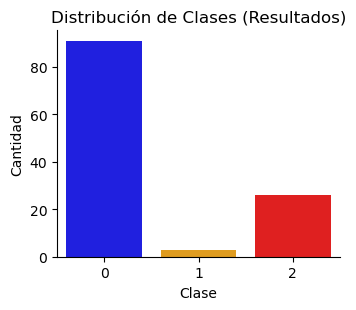

In [5]:
dataframe['Resultados'] = dataframe['Resultados'].astype(int)

sns.catplot(x='Resultados', hue='Resultados', data=dataframe, kind="count", height=3, aspect=1.2,
            palette={0:"blue", 1:"orange", 2:"red"}, legend=False)
plt.title("Distribución de Clases (Resultados)")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

In [8]:
y = dataframe['Resultados']
x = dataframe.drop('Resultados', axis=1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

predicciones = knn.predict(x_test)

clasificadores = ["No Diabetes", "Pre Diabetes", "Diabetes"]

              No Diabetes  Pre Diabetes  Diabetes
No Diabetes            26             0         1
Pre Diabetes            0             0         0
Diabetes                7             0         2


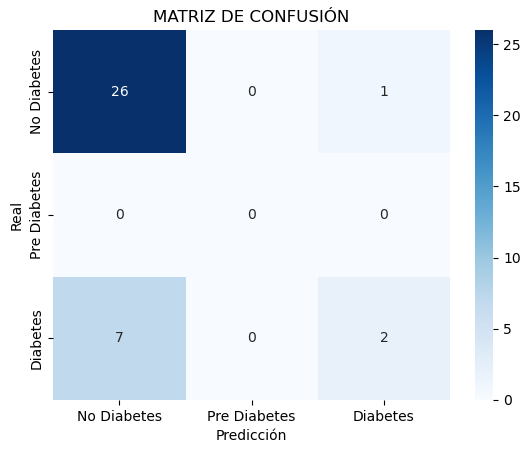

In [13]:
matriz = confusion_matrix(y_test, predicciones, labels=[0, 1, 2])
print(pd.DataFrame(matriz, index=clasificadores, columns=clasificadores))

sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", xticklabels=clasificadores, yticklabels=clasificadores)
plt.title('MATRIZ DE CONFUSIÓN')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [22]:
print(classification_report(y_test, predicciones, labels=[0, 1, 2], target_names=clasificadores))

              precision    recall  f1-score   support

 No Diabetes       0.79      0.96      0.87        27
Pre Diabetes       0.00      0.00      0.00         0
    Diabetes       0.67      0.22      0.33         9

    accuracy                           0.78        36
   macro avg       0.48      0.40      0.40        36
weighted avg       0.76      0.78      0.73        36



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: Undefined

In [28]:
# Datos para un nuevo paciente
nuevo_paciente = [[2, 125, 82, 30, 90, 33, 0.7, 37, 0, 2, 1, 1, 4]]

# Realizaremos la predicción
prediccion_nuevo = knn.predict(nuevo_paciente)
probabilidades_nuevo = knn.predict_proba(nuevo_paciente)

print("Predicción para el nuevo paciente:", prediccion_nuevo[0])
print("Probabilidades por clase (No Diabetes, Pre Diabetes, Diabetes):", probabilidades_nuevo[0])

print("Diagnóstico:", clasificadores[prediccion_nuevo[0]])


Predicción para el nuevo paciente: 0
Probabilidades por clase (No Diabetes, Pre Diabetes, Diabetes): [0.6 0.2 0.2]
Diagnóstico: No Diabetes


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
